# Satna proizvodnja električne energije iz solarnih elektrana

Za analizu satne proizvodnje električne energije iz solarnih elektrana korišteni su podaci dostupni na linku https://www.sunnyportal.com/Templates/PublicPagesPlantList.aspx sa filterima za BiH i snagu od 150 kWp. Sa navedenog portala se moggu preuzeti satni podaci za sve elektrane koje su u bazi, ali je preuzimanje za neke elektrane izuzetno dugotrajan zadatak. Iz tog razloga su preuzeti satni podaci za 2019., 2020. i 2021. za FNE Krenica 1 (Grude) i FNE Hodovo 1 (Stolac) i za FNE Enelectronic (Čitluk). Ove FNE imaju opciju "Plant overview" kojim se olakšava preuzimanje fajlova na satnoj osnovi, te su one odabrane za cjelokupnu analizu. Ukupna godišnja proizvodnja će se skalirati prema zbiru proizvodnje ovih elektrana. Rezolucija podataka je svakih 15 minuta za Krenicu1 i Hodovo1, odnosno 1 sat za Enelectronic, te će se izvršiti uzorkovanje na satnu rezoluciju. Tehnički podaci o FNE su dati na slikama:


In [1]:
import pandas as pd
import numpy as np
import datetime as dt

## Priprema fajlova

In [2]:
def open_the_file(filename,sheets):
    filex=pd.read_excel(filename,sheets,header=0)
    return filex #otvaranje

In [3]:
def drop_empty_rows(filex):
    filex.drop(filex[filex[0]=='Diagram values'].index,inplace=True)
    filex.dropna(subset=[0],inplace=True)
    return filex #brisanje praznih redova

In [4]:
#dodavanje vremenskog otiska
def assign_timestamp(filex,start,end,freq):
    filex=filex.assign(Timestamp=pd.date_range(start,end, freq=freq).values)
    return filex


In [5]:
def set_index(filex):
    filex=filex.set_index(filex['Timestamp'].astype('datetime64[ns]'))
    return filex
#index

In [6]:
from datetime import datetime
def assign_date(filex):
    filex=filex.assign(Date=filex.index.to_pydatetime())
    return filex

#dodjela datuma

In [7]:
file1,file3=open_the_file("enelectronic_2019.xlsx",0),open_the_file("kr_hod_2019.xlsx",0)
file1_2020,file3_2020=open_the_file("enelectronic_2020.xlsx",0),open_the_file("kr_hod_2020.xlsx",0)
file1_2021,file3_2021=open_the_file("enelectronic_2021.xlsx",0),open_the_file("kr_hod_2021.xlsx",0)

In [8]:
file1 = file1.drop(index=range(23))
file1=file1.assign(Timestamp=pd.date_range("2019-01-01 00:00:00","2020-01-01", freq="1H").values)
file3=file3.assign(Timestamp=pd.date_range("2019-01-01 00:15:00","2020-01-01",freq= "15T").values)

file1_2020 = file1_2020.drop(index=range(23))
file1_2020=file1_2020.assign(Timestamp=pd.date_range("2020-01-01 00:00:00","2020-12-31", freq="1H").values)
file3_2020=file3_2020.assign(Timestamp=pd.date_range("2020-01-01 00:15:00","2021-01-01",freq= "15T").values)


file1_2021 = file1_2021.drop(index=range(23))
file1_2021=file1_2021.assign(Timestamp=pd.date_range("2021-01-01 00:00:00","2022-01-01", freq="1H").values)
file3_2021=file3_2021.assign(Timestamp=pd.date_range("2021-01-01 00:15:00","2022-01-01",freq= "15T").values)

In [9]:
new_columns_kr=['Unnamed: 0','Krenica1PowerMean values  [kW]','Hodovo1PowerMean values  [kW]']
new_columns_ene=['Unnamed: 0',"Enelectronic - Power, kW","Enelectronic - Total yield, kW"]


file1,file3=set_index(file1),set_index(file3)
file2,file4=file1.resample('1H').sum(),file3.resample('1H').sum()



file2.columns=new_columns_ene
file4.columns=new_columns_kr
file2,file4=assign_date(file2),assign_date(file4)
#file4.columns=["Hour","Enelectronic - Power, W","Enelectronic - Total yield, W","Timestamp","Date"]




file1_2020,file3_2020=set_index(file1_2020),set_index(file3_2020)
file2_2020,file4_2020=file1_2020.resample('1H').sum(),file3_2020.resample('1H').sum()

file2_2020.columns=new_columns_ene
file4_2020.columns=new_columns_kr
file2_2020,file4_2020=assign_date(file2_2020),assign_date(file4_2020)
#file4.columns=["Hour","Enelectronic - Power, W","Enelectronic - Total yield, W","Timestamp","Date"]


file1_2021,file3_2021=set_index(file1_2021),set_index(file3_2021)
file2_2021,file4_2021=file1_2021.resample('1H').sum(),file3_2021.resample('1H').sum()

file2_2021.columns=new_columns_ene
file4_2021.columns=new_columns_kr
file2_2021,file4_2021=assign_date(file2_2021),assign_date(file4_2021)
#file4.columns=["Hour","Enelectronic - Power, W","Enelectronic - Total yield, W","Timestamp","Date"]

Grafički prikaz će uključivati i analizu po mjesecima, te će se ta kolona uključiti u dataset.

In [10]:

file2=file2.assign(Month=file2["Date"].dt.month)
file4=file4.assign(Month=file4["Date"].dt.month)


file2_2020=file2_2020.assign(Month=file2_2020["Date"].dt.month)
file4_2020=file4_2020.assign(Month=file4_2020["Date"].dt.month)


file2_2021=file2_2021.assign(Month=file2_2021["Date"].dt.month)
file4_2021=file4_2021.assign(Month=file4_2021["Date"].dt.month)

In [11]:
file2.head(2)

,Unnamed: 0,"Enelectronic - Power, kW","Enelectronic - Total yield, kW",Date,Month
Timestamp,,,,,
2019-01-01 00:00:00,23,0.0,0.0,2019-01-01 00:00:00,1
2019-01-01 01:00:00,24,0.0,0.0,2019-01-01 01:00:00,1


In [12]:
file4.head(2)

,Unnamed: 0,Krenica1PowerMean values [kW],Hodovo1PowerMean values [kW],Date,Month
Timestamp,,,,,
2019-01-01 00:00:00,3,0.0,0.0,2019-01-01 00:00:00,1
2019-01-01 01:00:00,18,0.0,0.0,2019-01-01 01:00:00,1


In [13]:
file_total=pd.merge(file2,file4,how='inner', left_on=['Date',"Month"], right_on=['Date',"Month"])
file_total_2020=pd.merge(file2_2020,file4_2020,how='inner', left_on=['Date',"Month"], right_on=['Date',"Month"])
file_total_2021=pd.merge(file2_2021,file4_2021,how='inner', left_on=['Date',"Month"], right_on=['Date',"Month"])

In [14]:
file_total.head(2)

,Unnamed: 0_x,"Enelectronic - Power, kW","Enelectronic - Total yield, kW",Date,Month,Unnamed: 0_y,Krenica1PowerMean values [kW],Hodovo1PowerMean values [kW]
0,23,0.0,0.0,2019-01-01 00:00:00,1,3,0.0,0.0
1,24,0.0,0.0,2019-01-01 01:00:00,1,18,0.0,0.0


<AxesSubplot:xlabel='Month'>

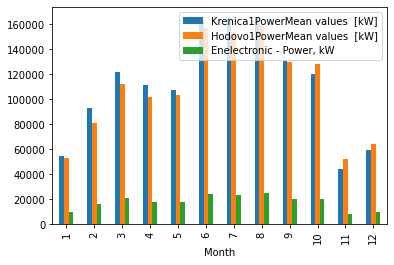

In [15]:
file_total.groupby("Month")[['Krenica1PowerMean values  [kW]','Hodovo1PowerMean values  [kW]','Enelectronic - Power, kW']].sum().plot(kind="bar")

<AxesSubplot:xlabel='Month'>

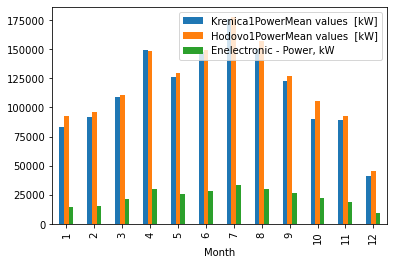

In [16]:
file_total_2020.groupby("Month")[['Krenica1PowerMean values  [kW]','Hodovo1PowerMean values  [kW]','Enelectronic - Power, kW']].sum().plot(kind="bar")

<AxesSubplot:xlabel='Month'>

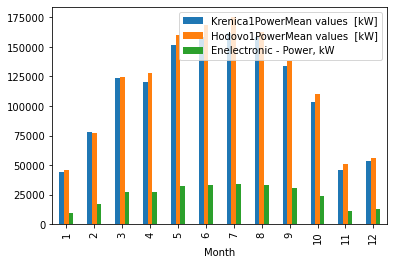

In [17]:
file_total_2021.groupby("Month")[['Krenica1PowerMean values  [kW]','Hodovo1PowerMean values  [kW]','Enelectronic - Power, kW']].sum().plot(kind="bar")

In [18]:
(file_total["Krenica1PowerMean values  [kW]"].sum(axis=0)+file_total["Hodovo1PowerMean values  [kW]"].sum()+file_total["Enelectronic - Power, kW"].sum())/1000000

2.8432525049999997

In [19]:
(file_total_2020["Krenica1PowerMean values  [kW]"].sum(axis=0)+file_total_2020["Hodovo1PowerMean values  [kW]"].sum()+file_total_2020["Enelectronic - Power, kW"].sum())/1000000

3.085898867

In [20]:
(file_total_2021["Krenica1PowerMean values  [kW]"].sum(axis=0)+file_total_2021["Hodovo1PowerMean values  [kW]"].sum()+file_total_2021["Enelectronic - Power, kW"].sum())/1000000

3.0224174510000004